In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [4]:
# File paths
train_path = r"C:\Users\ajcho\OneDrive\Desktop\full stack data science and AI\BY SELF\Projects\Loan predection\train_data.csv"
test_path = r"C:\Users\ajcho\OneDrive\Desktop\full stack data science and AI\BY SELF\Projects\Loan predection\test_data.csv"

# Load datasets
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Display first few rows
print(train_df.head())
print(test_df.head())


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [6]:
# Shape of datasets
print("Train Data Shape:", train_df.shape)
print("Test Data Shape:", test_df.shape)

# Column Info
print(train_df.info())

# Summary statistics
print(train_df.describe())

Train Data Shape: (614, 13)
Test Data Shape: (367, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
       ApplicantIncome  CoapplicantIncome  LoanAmoun

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


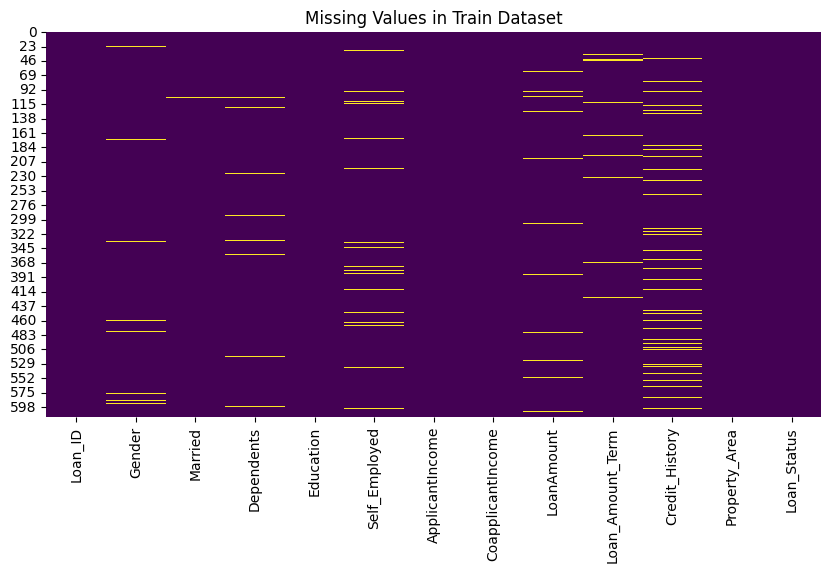

In [8]:
# Count missing values
print(train_df.isnull().sum())

# Visualize missing values
plt.figure(figsize=(10, 5))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Train Dataset")
plt.show()


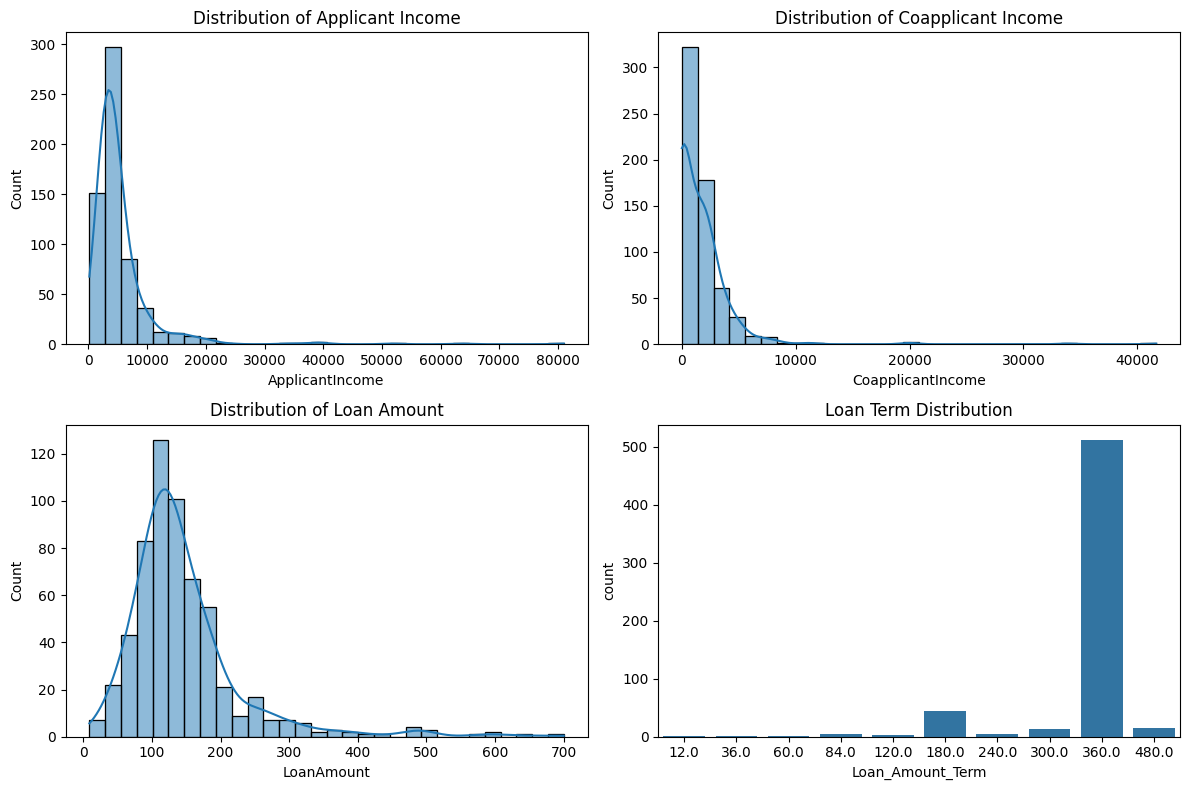

In [10]:
# Histograms for numerical variables
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(train_df['ApplicantIncome'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Applicant Income")

sns.histplot(train_df['CoapplicantIncome'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Coapplicant Income")

sns.histplot(train_df['LoanAmount'].dropna(), bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Loan Amount")

sns.countplot(x=train_df['Loan_Amount_Term'], ax=axes[1, 1])
axes[1, 1].set_title("Loan Term Distribution")

plt.tight_layout()
plt.show()


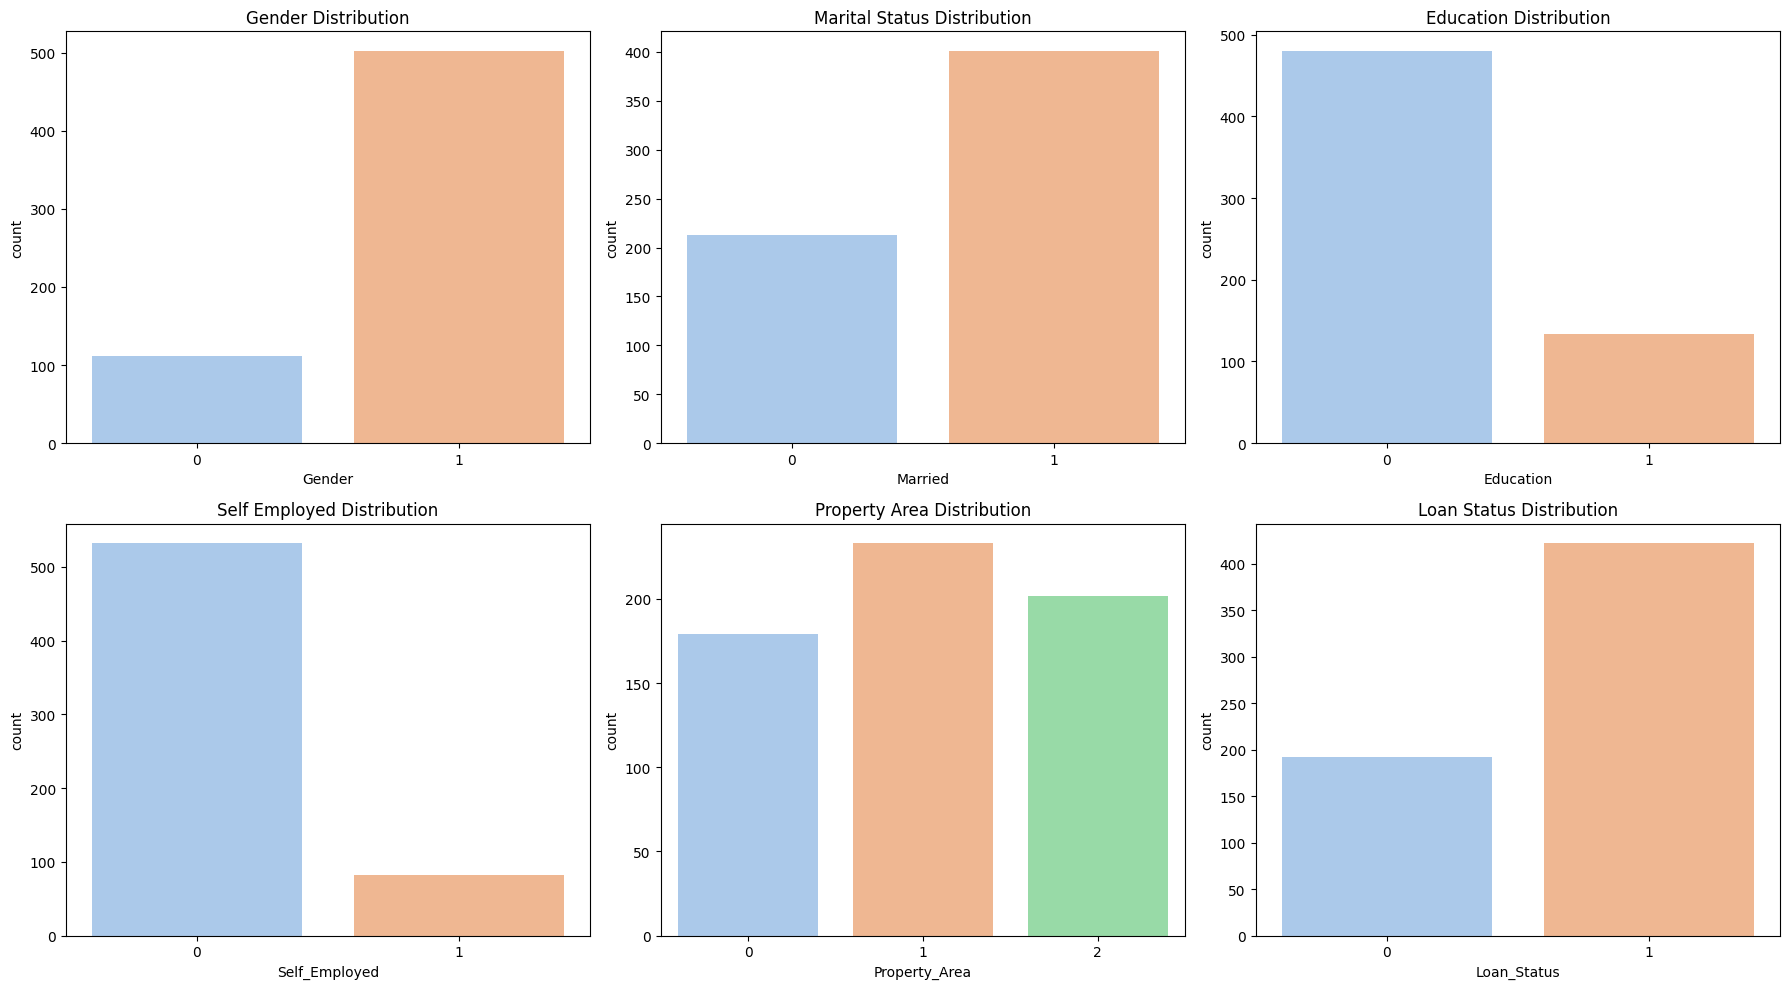

In [32]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.countplot(x='Gender', data=train_df, ax=axes[0, 0], hue='Gender', palette="pastel", legend=False)
axes[0, 0].set_title("Gender Distribution")

sns.countplot(x='Married', data=train_df, ax=axes[0, 1], hue='Married', palette="pastel", legend=False)
axes[0, 1].set_title("Marital Status Distribution")

sns.countplot(x='Education', data=train_df, ax=axes[0, 2], hue='Education', palette="pastel", legend=False)
axes[0, 2].set_title("Education Distribution")

sns.countplot(x='Self_Employed', data=train_df, ax=axes[1, 0], hue='Self_Employed', palette="pastel", legend=False)
axes[1, 0].set_title("Self Employed Distribution")

sns.countplot(x='Property_Area', data=train_df, ax=axes[1, 1], hue='Property_Area', palette="pastel", legend=False)
axes[1, 1].set_title("Property Area Distribution")

sns.countplot(x='Loan_Status', data=train_df, ax=axes[1, 2], hue='Loan_Status', palette="pastel", legend=False)
axes[1, 2].set_title("Loan Status Distribution")

plt.tight_layout()
plt.show()


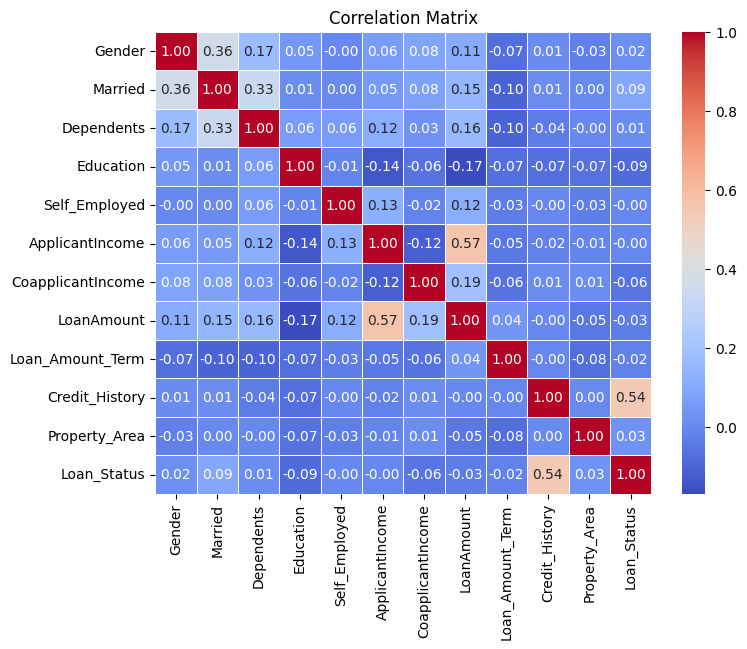

In [26]:
# Drop non-numeric columns before computing correlation
train_numeric = train_df.select_dtypes(include=[np.number])  

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(train_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [34]:
# Fill categorical missing values with mode
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    train_df.loc[:, col] = train_df[col].fillna(train_df[col].mode()[0])
    test_df.loc[:, col] = test_df[col].fillna(test_df[col].mode()[0])

# Fill numerical missing values with median
for col in ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    train_df.loc[:, col] = train_df[col].fillna(train_df[col].median())
    test_df.loc[:, col] = test_df[col].fillna(test_df[col].median())

# Confirm missing values are handled
print(train_df.isnull().sum())
print(test_df.isnull().sum())


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [18]:
encoder = LabelEncoder()

for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    train_df[col] = encoder.fit_transform(train_df[col])

for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']:
    test_df[col] = encoder.fit_transform(test_df[col])

# Convert 'Dependents' to numeric
train_df['Dependents'] = train_df['Dependents'].replace('3+', 3).astype(int)
test_df['Dependents'] = test_df['Dependents'].replace('3+', 3).astype(int)

# Drop 'Loan_ID'
train_df.drop(columns=['Loan_ID'], inplace=True)
test_original = pd.read_csv(test_path)  # Reload to keep Loan_ID


In [20]:
X = train_df.drop(columns=['Loan_Status'])
y = train_df['Loan_Status']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [22]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions on validation set
y_pred = rf_model.predict(X_val)

# Model Evaluation
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))


Accuracy: 0.8292682926829268
Confusion Matrix:
 [[24 14]
 [ 7 78]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.63      0.70        38
           1       0.85      0.92      0.88        85

    accuracy                           0.83       123
   macro avg       0.81      0.77      0.79       123
weighted avg       0.83      0.83      0.82       123



In [30]:
# Ensure Loan_ID is removed from the test dataset
test_df = test_df.drop(columns=['Loan_ID'], errors='ignore')

# Now predict
test_predictions = rf_model.predict(test_df)
test_predictions

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
# Load the original test dataset to retain Loan_IDs
final_submission = pd.DataFrame({
    "Loan_ID": test_original["Loan_ID"],  # Restore original Loan_IDs
    "Loan_Status": test_predictions       # Predicted values (Y/N)
})

# Convert predictions back to 'Y' and 'N'
final_submission['Loan_Status'] = final_submission['Loan_Status'].map({1: 'Y', 0: 'N'})

# Save the final submission file
submission_path = "/mnt/data/final_loan_submission.csv"
final_submission.to_csv(submission_path, index=False)

print("Submission file saved at:", submission_path)
